# <span style='color:blue'> CDS 522 Text and Speech Analytics Project : </span>
## <span style='color:blue'> Text Analytics for Suicidal Thoughts </span>

**Prepared by: 
Chin Yi Xiang,
Ling Hui Ting**

# Topic Modeling

* Each notes is represented as a distribution over topics.
* Each topic is represented as a distribution over words.

## Importing Required Packages and Defining Helper Functions

### Packages

In [30]:
# import required packages
#warnings :)
import warnings
warnings.filterwarnings('ignore')

# for df purpose
import pandas as pd
import numpy as np
from tqdm.auto import tqdm
tqdm.pandas()

# for text processing
import nltk
import re
import string
from autocorrect import Speller

# for topic modelling
import gensim as gensim
from gensim import matutils, models, corpora
import scipy.sparse
import pyLDAvis.gensim

# for graph plotting / visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#for storing intermediate results
import pickle

# for notebook function
from IPython.display import display, clear_output
import time

# for topic modelling
import gensim as gensim
from gensim import corpora
from gensim import matutils, models
import scipy.sparse
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

### Helper Functions

In [2]:
def print_bold(text):
    text_bold = '\x1b[1;30;47m'+text+ '\x1b[0m'
    print(text_bold)
def glance(x,n=5):
    try:
        iterator = iter(x)
    except:
        print(x)
        return
    else:
        if type(x) == str or len(str(x)) <= 50:
            print(x)
            return
        if type(x) == dict:
            iterator = x.items()
        i = 0
        for ele in iterator:
            if i >= n:
                break
            glance(ele,n)
            i += 1

## Topic Modeling - Attempt #1 (All Texts)

### Reading Data

In [3]:
df = pd.read_pickle('pickles/df_clean.pkl')
df

0       [fucking, hate, holiday, season, first, thanks...
1          [dm, add, discord, want, help, talk, cofactor]
2       [nearly, always, battled, depression, got, old...
3       [future, nothing, impenetrable, fog, look, bac...
4       [always, fighting, sister, always, lash, mom, ...
                              ...                        
1293    [since, felt, depressed, almost, took, life, w...
1294    [nt, know, reaching, time, seem, appropriate, ...
1295    [dont, believe, afterlife, stay, night, fear, ...
1296    [nt, think, actually, kill, thats, scared, nt,...
1297    [wan, na, die, badly, everytim, hear, someone,...
Name: text, Length: 1283, dtype: object

In [4]:
data = pd.read_pickle('pickles/dtm.pkl')
data

,aaa,ab,abandon,abandoned,abd,abdomen,abdominal,ability,ablaze,able,...,zero,zimbabwe,ziplock,zombie,zone,zoning,zoo,zoom,zopiclon,última
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1293,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1294,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1295,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1296,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# One of the required inputs is a term-document matrix
tdm = data.transpose()
tdm.head()

,0,1,2,3,4,5,6,7,8,9,...,1288,1289,1290,1291,1292,1293,1294,1295,1296,1297
aaa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ab,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abandon,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abandoned,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abd,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Converting Data to Corpus

In [6]:
# put the term-document matrix into a new gensim format, from df --> sparse matrix --> gensim corpus
sparse_counts = scipy.sparse.csr_matrix(tdm)
corpus = matutils.Sparse2Corpus(sparse_counts)
pickle.dump(corpus,open('pickles/corpus.pkl','wb'))
dictionary = corpora.Dictionary(df)
pickle.dump(dictionary,open('pickles/dictionary.pkl','wb'))

### Topic Modelling

#### Base Model

In [62]:
# the corpus (term-document matrix) and dictionary (dictionary of location: term),
# specify two other parameters as well - the number of topics and the number of passes
# 5 topic
lda = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, passes=50)
lda.print_topics()

[(0,
  '0.006*"seekers" + 0.005*"faster" + 0.005*"intentional" + 0.005*"evaluation" + 0.004*"sertraline" + 0.003*"insist" + 0.003*"changing" + 0.003*"ledge" + 0.003*"supernatural" + 0.003*"theyre"'),
 (1,
  '0.034*"magic" + 0.015*"seekers" + 0.011*"cite" + 0.010*"aide" + 0.009*"rob" + 0.009*"fading" + 0.009*"barking" + 0.008*"blacklist" + 0.008*"videogame" + 0.008*"everlasting"'),
 (2,
  '0.024*"rob" + 0.023*"base" + 0.022*"blacklist" + 0.015*"magic" + 0.014*"aide" + 0.013*"seekers" + 0.010*"fading" + 0.009*"theyre" + 0.009*"fiend" + 0.008*"rot"'),
 (3,
  '0.022*"magic" + 0.008*"rob" + 0.007*"videogame" + 0.005*"foggy" + 0.005*"supernatural" + 0.004*"sentence" + 0.004*"spouse" + 0.004*"everlasting" + 0.004*"theyre" + 0.004*"profit"'),
 (4,
  '0.008*"gifted" + 0.008*"everlasting" + 0.005*"fading" + 0.005*"craved" + 0.005*"insist" + 0.005*"regularly" + 0.004*"keeping" + 0.004*"bunch" + 0.004*"helplessness" + 0.004*"adventure"')]

In [66]:
coherence_score = models.CoherenceModel(model=lda, texts=df, dictionary=dictionary, coherence='c_v').get_coherence()
coherence_score

0.7560628806319644

#### Hyperparameter Tuning

##### Defining Function

In [88]:
def grid_search_tuning(corpus, dictionary,topics_range=None, alpha=None, beta=None, random_state=100):
    
    # supporting function
    def compute_coherence_values(corpus, dictionary, k, a, b, random_state=100):

        lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                               id2word=dictionary,
                                               num_topics=k, 
                                               random_state=random_state,
                                               chunksize=100,
                                               passes=10,
                                               alpha=a,
                                               eta=b,
                                              )

        coherence_model_lda = models.CoherenceModel(model=lda_model, texts=df, dictionary=dictionary, coherence='c_v')

        return coherence_model_lda.get_coherence()

    # Topics range
    if topics_range is None:
        min_topics = 3
        max_topics = 5
        step_size = 1
        topics_range = range(min_topics, max_topics, step_size)
        print('Using default topics range: ',topics_range)
    else:
        print('topics_range: ',topics_range)

    # Alpha parameter
    if alpha is None:
        alpha = list(np.arange(0.01, 1, 0.3))
        alpha.append('symmetric')
        alpha.append('asymmetric')
        print('Using default alpha list: ',alpha)
    else:
        print('alpha: ',alpha)

    # Beta parameter
    if beta is None:
        beta = list(np.arange(0.01, 1, 0.3))
        beta.append('symmetric')
        print('Using default beta list: ',beta)
    else:
        print('beta: ',beta)

    model_results = {
        'Topics': [],
        'Alpha': [],
        'Beta': [],
        'Coherence': []
    }

    # Can take a long time to run
    if 1 == 1:
        pbar = tqdm(total=len(topics_range)*len(alpha)*len(beta))
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus, dictionary=dictionary, k=k, a=a, b=b, random_state=random_state)
                    # Save the model results
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)

                    pbar.update(1)
#         pd.DataFrame(model_results).to_csv('outputs/lda_tuning_results.csv', index=False)
        pbar.close()
    return model_results

##### Perform Tuning

In [89]:
model_results = pd.DataFrame(grid_search_tuning(corpus,dictionary))
model_results.sample(5)

Using default topics range:  range(3, 5)
Using default alpha list:  [0.01, 0.31, 0.61, 0.9099999999999999, 'symmetric', 'asymmetric']
Using default beta list:  [0.01, 0.31, 0.61, 0.9099999999999999, 'symmetric']


,Topics,Alpha,Beta,Coherence
51,4,symmetric,0.31,0.756376
57,4,asymmetric,0.61,0.757776
20,3,symmetric,0.01,0.796256
37,4,0.31,0.61,0.769738
21,3,symmetric,0.31,0.737625


In [93]:
top_models = model_results.sort_values('Coherence',ascending=False).head(5)
# tuning_results['Group'] = tuning_results[['Alpha','Beta']].apply(lambda x: ', '.join(x.astype(str)), axis=1)
# sns.lineplot(x='Topics', y='Coherence', data=tuning_results, hue='Group')
top_models

,Topics,Alpha,Beta,Coherence
20,3,symmetric,0.01,0.796256
25,3,asymmetric,0.01,0.787444
15,3,0.91,0.01,0.785998
35,4,0.31,0.01,0.784776
0,3,0.01,0.01,0.783088


#### Results and Visualization

In [101]:
# Best Performing Topic
[num_topics, alpha, eta] = top_models.iloc[0][['Topics','Alpha','Beta']]

lda = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=100, alpha=alpha, eta=eta)
lda.save('models/lda.gensim')
lda.print_topics()

[(0,
  '0.026*"magic" + 0.019*"rob" + 0.013*"base" + 0.012*"seekers" + 0.011*"fading" + 0.011*"blacklist" + 0.009*"aide" + 0.008*"theyre" + 0.008*"cite" + 0.008*"rot"'),
 (1,
  '0.015*"magic" + 0.013*"gifted" + 0.012*"rob" + 0.011*"theyre" + 0.011*"monitor" + 0.010*"base" + 0.009*"fading" + 0.008*"incarnate" + 0.007*"fiend" + 0.007*"insist"'),
 (2,
  '0.024*"blacklist" + 0.021*"base" + 0.019*"magic" + 0.018*"rob" + 0.017*"seekers" + 0.016*"aide" + 0.012*"barking" + 0.011*"fiend" + 0.011*"everlasting" + 0.009*"chase"')]

In [147]:
coherence_score = models.CoherenceModel(model=lda, texts=df, dictionary=dictionary, coherence='c_v').get_coherence()
coherence_score

0.7909998039469857

In [102]:
lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)

pyLDAvis.save_html(lda_display, 'html/vis_lda.html')
pyLDAvis.display(lda_display)

## Topic Modeling - Attempt #2 (Nouns Only)

* Look only at terms that are from part of speech (only nouns, only adjectives, etc.)
* UPenn tag set: https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html.

### Reading Data

In [103]:
df_pos = pd.read_pickle('pickles/df_pos.pkl')
df_pos

,tokens,count,pos,pos_count,CC,FW,VB,EX,IN,WRB,...,PRP,PRP$,CD,MD,WDT,RB,JJ,NN,WP$,WP
0,"[fucking, hate, holiday, season, first, thanks...",47,"[(fucking, VB), (hate, NN), (holiday, NN), (se...","{'VB': 12, 'NN': 18, 'RB': 6, 'JJ': 7, 'MD': 3...",[],[],"[fucking, thanksgiving, thankful, fucking, die...",[],[],[],...,[],[],[one],"[would, would, could]",[],"[first, already, actually, back, shitty, really]","[thankful, next, nice, new, new, wish, fucking]","[hate, holiday, season, nothing, everyone, hat...",[],[]
1,"[dm, add, discord, want, help, talk, cofactor]",7,"[(dm, NN), (add, VB), (discord, NN), (want, VB...","{'NN': 4, 'VB': 3}",[],[],"[add, want, talk]",[],[],[],...,[],[],[],[],[],[],[],"[dm, discord, help, cofactor]",[],[]
2,"[nearly, always, battled, depression, got, old...",203,"[(nearly, RB), (always, RB), (battled, VB), (d...","{'RB': 27, 'VB': 45, 'NN': 81, 'JJ': 35, 'IN':...",[],[],"[battled, got, starting, start, felt, validate...",[],"[like, wind, like, as, like, though, like, lik...",[],...,[],[],[],"[could, may, ca, ca]",[whatever],"[nearly, always, late, also, always, rather, a...","[older, insight, ssri, possible, terrified, si...","[depression, deal, anxiety, therapy, way, lowe...",[],[]
3,"[future, nothing, impenetrable, fog, look, bac...",31,"[(future, JJ), (nothing, NN), (impenetrable, J...","{'JJ': 9, 'NN': 14, 'VB': 4, 'RB': 2, 'IN': 1,...",[],[],"[look, come, take, give]",[],[like],[],...,[],[],[one],[],[],"[back, ever]","[future, impenetrable, happy, distant, unable,...","[nothing, fog, time, memory, picture, feeling,...",[],[]
4,"[always, fighting, sister, always, lash, mom, ...",27,"[(always, RB), (fighting, VB), (sister, NN), (...","{'RB': 7, 'VB': 3, 'NN': 11, 'JJ': 5, 'IN': 1}",[],[],"[fighting, keeping, going]",[],[nt],[],...,[],[],[],[],[],"[always, always, really, always, nt, suicide, ...","[lash, wrong, bad, fault, matter]","[sister, mom, anything, today, fight, somehow,...",[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1293,"[since, felt, depressed, almost, took, life, w...",56,"[(since, IN), (felt, NN), (depressed, VB), (al...","{'IN': 2, 'NN': 14, 'VB': 18, 'RB': 9, 'JJ': 13}",[],[],"[depressed, took, went, turned, get, everynigh...",[],"[since, unless]",[],...,[],[],[],[],[],"[almost, away, never, even, sometimes, back, n...","[old, sleep, give, massive, sleep, depressed, ...","[felt, life, year, thought, race, headache, th...",[],[]
1294,"[nt, know, reaching, time, seem, appropriate, ...",233,"[(nt, RB), (know, VB), (reaching, VB), (time, ...","{'RB': 20, 'VB': 47, 'NN': 93, 'JJ': 57, 'IN':...",[],[],"[know, reaching, seem, told, getting, nt, put,...",[],"[since, disregard, like, africa, nt, nt, along]",[],...,[],[],"[three, two, one, one]","[could, would, ca, wo, ca]",[],"[nt, much, understand, nt, anywhere, long, cau...","[appropriate, speeding, stupid, accident, attr...","[time, family, value, life, fine, danger, trut...",[],[]
1295,"[dont, believe, afterlife, stay, night, fear, ...",24,"[(dont, NN), (believe, VB), (afterlife, NN), (...","{'NN': 10, 'VB': 7, 'RB': 3, 'JJ': 4}",[],[],"[believe, fear, kept, dying, believe, get, go]",[],[],[],...,[],[],[],[],[],"[maybe, also, still]","[alive, afraid, dont, afraid]","[dont, afterlife, stay, night, afterlife, hell...",[],[]
1296,"[nt, think, actually, kill, thats, scared, nt,...",119,"[(nt, RB), (think, VB), (actually, RB), (kill,...","{'RB': 15, 'VB': 24, 'NN': 53, 'JJ': 21, 'MD':...",[],[],"[think, kill, scared, thought, stressed, nt, s...",[],"[though, as]",[],...,[],[],[one],"[would, could]",[],"[nt, actually, really, certainly, always, aggr...","[nt, want, many, narcissist, radical, terrible...","[thats, month, moment, mother, textbook, chris...",[],[]


In [105]:
df_nouns = df_pos['NN'].apply(lambda x: ' '.join(x))
df_nouns

0       hate holiday season nothing everyone hate hate...
1                                dm discord help cofactor
2       depression deal anxiety therapy way lowest dos...
3       nothing fog time memory picture feeling moment...
4       sister mom anything today fight somehow opinio...
                              ...                        
1293    felt life year thought race headache thought b...
1294    time family value life fine danger truth risk ...
1295    dont afterlife stay night afterlife hell athei...
1296    thats month moment mother textbook christian m...
1297           wan someone cry hour sorry anyone pain way
Name: NN, Length: 1283, dtype: object

### Converting Data to Corpus

In [106]:
# Re-add the additional stop words since we are recreating the document-term matrix
add_stop_words = ['i', 'im', 'thing','dont','year','time','day','way',
                 'que','eu','edge','fuck']
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

df_noun = df_pos
# Recreate a document-term matrix with only nouns
cvn = CountVectorizer(stop_words=stop_words,max_df=.8)
data_cvn = cvn.fit_transform(df_nouns)
data_dtmn = pd.DataFrame(data_cvn.toarray(), columns=cvn.get_feature_names())
data_dtmn.index = df_nouns.index
data_dtmn


,ab,abdomen,ability,abortion,absence,absolute,abuse,abuser,abusinghurt,abusive,...,zap,zero,zimbabwe,ziplock,zombie,zone,zoo,zoom,zopiclon,última
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1293,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1294,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1295,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1296,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [107]:
# Create the gensim corpus
corpusn = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmn.transpose()))
pickle.dump(corpusn,open('pickles/corpusn.pkl','wb'))
dictionary = pickle.load(open('pickles/dictionary.pkl','rb'))
# Create the vocabulary dictionary
# id2wordn = dict((v, k) for k, v in cvn.vocabulary_.items())

### Topic Modelling

#### Base Model

In [108]:
# 5 topics
ldan = models.LdaModel(corpus=corpusn, num_topics=5, id2word=dictionary, passes=100)
ldan.print_topics()

[(0,
  '0.042*"insecure" + 0.027*"aspect" + 0.024*"patio" + 0.017*"addiction" + 0.015*"naked" + 0.012*"overcome" + 0.011*"every" + 0.011*"paying" + 0.010*"distracted" + 0.009*"hinder"'),
 (1,
  '0.016*"naked" + 0.015*"paying" + 0.012*"insecure" + 0.011*"patio" + 0.010*"overcome" + 0.009*"dysphoria" + 0.009*"everlasting" + 0.009*"finished" + 0.008*"law" + 0.007*"distracted"'),
 (2,
  '0.008*"manipulative" + 0.003*"washing" + 0.003*"wash" + 0.003*"anytime" + 0.002*"extract" + 0.002*"sideways" + 0.002*"acknowledge" + 0.002*"torment" + 0.002*"sing" + 0.002*"draw"'),
 (3,
  '0.005*"assignment" + 0.004*"continues" + 0.002*"ineffective" + 0.002*"controversial" + 0.002*"obliged" + 0.002*"abuse" + 0.002*"silly" + 0.002*"confession" + 0.002*"finger" + 0.002*"onexmayb"'),
 (4,
  '0.005*"share" + 0.004*"happily" + 0.003*"suffice" + 0.003*"asking" + 0.003*"previous" + 0.003*"againmy" + 0.003*"cane" + 0.003*"antidepressant" + 0.003*"none" + 0.003*"online"')]

In [110]:
coherence_score = models.CoherenceModel(model=ldan, texts=df, dictionary=dictionary, coherence='c_v').get_coherence()
coherence_score

0.7374951469464308

#### Hyperparameter Tuning

In [111]:
model_results = pd.DataFrame(grid_search_tuning(corpusn,dictionary))
model_results.sample(5)

Using default topics range:  range(3, 5)
Using default alpha list:  [0.01, 0.31, 0.61, 0.9099999999999999, 'symmetric', 'asymmetric']
Using default beta list:  [0.01, 0.31, 0.61, 0.9099999999999999, 'symmetric']


,Topics,Alpha,Beta,Coherence
12,3,0.61,0.61,0.725080
0,3,0.01,0.01,0.746978
37,4,0.31,0.61,0.717637
46,4,0.91,0.31,0.741374
15,3,0.91,0.01,0.754010


In [112]:
top_models = model_results.sort_values('Coherence',ascending=False).head(5)
# tuning_results['Group'] = tuning_results[['Alpha','Beta']].apply(lambda x: ', '.join(x.astype(str)), axis=1)
# sns.lineplot(x='Topics', y='Coherence', data=tuning_results, hue='Group')
top_models

,Topics,Alpha,Beta,Coherence
5,3,0.31,0.01,0.771386
50,4,symmetric,0.01,0.769907
10,3,0.61,0.01,0.769027
35,4,0.31,0.01,0.759974
25,3,asymmetric,0.01,0.759753


#### Results and Visualization

In [116]:
# Best Performing Topic
[num_topics, alpha, eta] = top_models.iloc[0][['Topics','Alpha','Beta']]

ldan = models.LdaModel(corpus=corpusn, id2word=dictionary, num_topics=num_topics, passes=100, alpha=alpha, eta=eta)
ldan.save('models/ldan.gensim')
ldan.print_topics()

[(0,
  '0.016*"naked" + 0.015*"aspect" + 0.014*"insecure" + 0.014*"previous" + 0.013*"addiction" + 0.012*"hinder" + 0.012*"overcome" + 0.011*"paying" + 0.011*"patio" + 0.010*"tran"'),
 (1,
  '0.055*"insecure" + 0.030*"patio" + 0.026*"aspect" + 0.019*"naked" + 0.013*"distracted" + 0.013*"overcome" + 0.013*"addiction" + 0.012*"every" + 0.012*"paying" + 0.011*"greatest"'),
 (2,
  '0.034*"insecure" + 0.024*"aspect" + 0.023*"patio" + 0.020*"finished" + 0.016*"addiction" + 0.013*"paying" + 0.012*"su" + 0.012*"expectancy" + 0.011*"denture" + 0.009*"humiliated"')]

In [148]:
coherence_score = models.CoherenceModel(model=ldan, texts=df, dictionary=dictionary, coherence='c_v').get_coherence()
coherence_score

0.7567000421981204

In [129]:
ldan_display = pyLDAvis.gensim.prepare(ldan, corpusn, dictionary, sort_topics=False)

pyLDAvis.save_html(ldan_display, 'html/vis_ldan.html')
pyLDAvis.display(ldan_display)

## Topic Modeling - Attempt #3 (Nouns and Adjectives)

### Reading Data

In [118]:
data_nouns_adj = (df_pos['NN'] + df_pos['JJ']).apply(lambda x: ' '.join(x))
data_nouns_adj

0       hate holiday season nothing everyone hate hate...
1                                dm discord help cofactor
2       depression deal anxiety therapy way lowest dos...
3       nothing fog time memory picture feeling moment...
4       sister mom anything today fight somehow opinio...
                              ...                        
1293    felt life year thought race headache thought b...
1294    time family value life fine danger truth risk ...
1295    dont afterlife stay night afterlife hell athei...
1296    thats month moment mother textbook christian m...
1297    wan someone cry hour sorry anyone pain way eve...
Length: 1283, dtype: object

In [119]:
# Create a new document-term matrix using nouns and adjectives
# Re-add the additional stop words since we are recreating the document-term matrix
add_stop_words = ['i', 'im', 'thing','dont','year','time','day','way',
                 'que','eu','edge','ive','fuck']
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)


# Create a new document-term matrix using only nouns and adjectives, also remove common words with max_df
cvna = CountVectorizer(stop_words=stop_words, max_df=.8)
data_cvna = cvna.fit_transform(data_nouns_adj)
data_dtmna = pd.DataFrame(data_cvna.toarray(), columns=cvna.get_feature_names())
data_dtmna.index = data_nouns_adj.index
data_dtmna

,aaa,ab,abandon,abandoned,abdomen,abdominal,ability,able,aborted,abortion,...,zap,zero,zimbabwe,ziplock,zombie,zone,zoo,zoom,zopiclon,última
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1293,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1294,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1295,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1296,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Converting Data into Corpus

In [120]:
# Create the gensim corpus
corpusna = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmna.transpose()))
pickle.dump(corpusna,open('pickles/corpusna.pkl','wb'))
# Create the vocabulary dictionary
# id2wordna = dict((v, k) for k, v in cvna.vocabulary_.items())
dictionary = pickle.load(open('pickles/dictionary.pkl','rb'))

### Topic Modelling

#### Base Model

In [121]:
# 5 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=5, id2word=dictionary, passes=100)
ldana.print_topics()

[(0,
  '0.010*"through" + 0.006*"intimidating" + 0.004*"fully" + 0.003*"crowley" + 0.003*"suffocation" + 0.003*"august" + 0.003*"tendency" + 0.003*"essay" + 0.003*"lifestyle" + 0.003*"than"'),
 (1,
  '0.005*"meaninglessly" + 0.004*"c" + 0.003*"best" + 0.003*"stem" + 0.003*"obligation" + 0.003*"cervix" + 0.003*"careonexloveonex" + 0.002*"august" + 0.002*"creepy" + 0.002*"skinny"'),
 (2,
  '0.003*"deadline" + 0.002*"chosen" + 0.002*"frequent" + 0.002*"doctrine" + 0.002*"reality" + 0.002*"big" + 0.002*"favorite" + 0.002*"insane" + 0.002*"obligation" + 0.002*"smack"'),
 (3,
  '0.025*"through" + 0.022*"essay" + 0.016*"confiding" + 0.015*"owe" + 0.013*"bewith" + 0.009*"kick" + 0.009*"august" + 0.009*"food" + 0.008*"alcohol" + 0.007*"disgusted"'),
 (4,
  '0.011*"owe" + 0.009*"confiding" + 0.006*"quality" + 0.006*"falling" + 0.006*"food" + 0.005*"alcohol" + 0.005*"parasite" + 0.005*"exercise" + 0.005*"through" + 0.004*"meaninglessly"')]

In [123]:
coherence_score = models.CoherenceModel(model=ldana, texts=df, dictionary=dictionary, coherence='c_v').get_coherence()
coherence_score

0.768450452055951

#### Hyperparameter Tuning

In [125]:
model_results = pd.DataFrame(grid_search_tuning(corpusna,dictionary))
model_results.sample(5)

Using default topics range:  range(3, 5)
Using default alpha list:  [0.01, 0.31, 0.61, 0.9099999999999999, 'symmetric', 'asymmetric']
Using default beta list:  [0.01, 0.31, 0.61, 0.9099999999999999, 'symmetric']


,Topics,Alpha,Beta,Coherence
43,4,0.61,0.91,0.769076
46,4,0.91,0.31,0.788735
4,3,0.01,symmetric,0.790750
49,4,0.91,symmetric,0.782652
33,4,0.01,0.91,0.765045


In [126]:
top_models = model_results.sort_values('Coherence',ascending=False).head(5)
# tuning_results['Group'] = tuning_results[['Alpha','Beta']].apply(lambda x: ', '.join(x.astype(str)), axis=1)
# sns.lineplot(x='Topics', y='Coherence', data=tuning_results, hue='Group')
top_models

,Topics,Alpha,Beta,Coherence
2,3,0.01,0.61,0.801836
25,3,asymmetric,0.01,0.799555
10,3,0.61,0.01,0.797320
20,3,symmetric,0.01,0.797040
0,3,0.01,0.01,0.796487


#### Results and Visualization

In [127]:
# Best Performing Topic
[num_topics, alpha, eta] = top_models.iloc[0][['Topics','Alpha','Beta']]

ldana = models.LdaModel(corpus=corpusna, id2word=dictionary, num_topics=num_topics, passes=100, alpha=alpha, eta=eta)
ldana.save('models/ldana.gensim')
ldana.print_topics()

[(0,
  '0.022*"through" + 0.018*"essay" + 0.014*"confiding" + 0.013*"owe" + 0.011*"bewith" + 0.008*"august" + 0.008*"kick" + 0.008*"food" + 0.007*"alcohol" + 0.006*"falling"'),
 (1,
  '0.003*"abyssand" + 0.002*"formatting" + 0.002*"damaged" + 0.002*"alike" + 0.002*"grampa" + 0.001*"disappointment" + 0.001*"decline" + 0.001*"crap" + 0.001*"decided" + 0.001*"massive"'),
 (2,
  '0.003*"lifestyle" + 0.002*"queria" + 0.002*"consume" + 0.001*"gor" + 0.001*"truth" + 0.001*"received" + 0.001*"stupidthank" + 0.001*"punto" + 0.001*"frequent" + 0.001*"amfightingyou"')]

In [149]:
coherence_score = models.CoherenceModel(model=ldana, texts=df, dictionary=dictionary, coherence='c_v').get_coherence()
coherence_score

0.779118077836082

In [128]:
ldana_display = pyLDAvis.gensim.prepare(ldana, corpusna, dictionary, sort_topics=False)

pyLDAvis.save_html(ldana_display, 'html/vis_ldana.html')
pyLDAvis.display(ldana_display)

## Topic Modeling - Attempt #4 (Nouns and Verbs)

### Reading Data

In [132]:
data_nouns_vbs = (df_pos['NN'] + df_pos['VB']).apply(lambda x: ' '.join(x))
data_nouns_vbs

0       hate holiday season nothing everyone hate hate...
1                  dm discord help cofactor add want talk
2       depression deal anxiety therapy way lowest dos...
3       nothing fog time memory picture feeling moment...
4       sister mom anything today fight somehow opinio...
                              ...                        
1293    felt life year thought race headache thought b...
1294    time family value life fine danger truth risk ...
1295    dont afterlife stay night afterlife hell athei...
1296    thats month moment mother textbook christian m...
1297    wan someone cry hour sorry anyone pain way die...
Length: 1283, dtype: object

In [136]:
# Create a new document-term matrix using only nouns and verbs
# Re-add the additional stop words since we are recreating the document-term matrix
add_stop_words = ['i', 'im', 'thing','dont','year','time','day','way',
                 'que','eu','edge','ive','fuck','make','want','know','try']
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)


# Create a new document-term matrix using only nouns and verbs, also remove common words with max_df
cvnv = CountVectorizer(stop_words=stop_words, max_df=.8)
data_cvnv = cvnv.fit_transform(data_nouns_vbs)
data_dtmnv = pd.DataFrame(data_cvnv.toarray(), columns=cvnv.get_feature_names())
data_dtmnv.index = data_nouns_vbs.index
data_dtmnv

,ab,abandon,abandoned,abdomen,ability,aborted,abortion,absconded,absence,absolute,...,zero,zimbabwe,ziplock,zombie,zone,zoning,zoo,zoom,zopiclon,última
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1293,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1294,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1295,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1296,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Converting Data into Corpus

In [137]:
# Create the gensim corpus
corpusnv = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmnv.transpose()))
pickle.dump(corpusnv,open('pickles/corpusnv.pkl','wb'))

# Create the vocabulary dictionary
# id2wordna = dict((v, k) for k, v in cvnai.vocabulary_.items())
dictionary = pickle.load(open('pickles/dictionary.pkl','rb'))

### Topic Modelling

#### Base Model

In [138]:
# 5 topics
ldanv = models.LdaModel(corpus=corpusnv, num_topics=5, id2word=dictionary, passes=100)
ldanv.save('models/ldanv5.gensim')

ldanv.print_topics()

[(0,
  '0.020*"apologies" + 0.017*"fired" + 0.017*"satan" + 0.015*"signed" + 0.012*"truth" + 0.011*"apart" + 0.010*"workalso" + 0.009*"unstoppable" + 0.009*"blaze" + 0.009*"forcing"'),
 (1,
  '0.003*"negativity" + 0.003*"everynight" + 0.002*"food" + 0.002*"coconut" + 0.002*"killing" + 0.002*"bleeding" + 0.002*"wave" + 0.002*"try" + 0.002*"despair" + 0.002*"saved"'),
 (2,
  '0.004*"forcing" + 0.003*"honestly" + 0.003*"punch" + 0.003*"pandemic" + 0.002*"changed" + 0.002*"valuable" + 0.002*"giant" + 0.002*"gay" + 0.002*"embarrassment" + 0.002*"chosen"'),
 (3,
  '0.034*"apologies" + 0.029*"fired" + 0.025*"blaze" + 0.023*"satan" + 0.019*"nasty" + 0.015*"apart" + 0.012*"denial" + 0.011*"sleep" + 0.011*"british" + 0.010*"terrifying"'),
 (4,
  '0.028*"satan" + 0.019*"apologies" + 0.015*"french" + 0.012*"purse" + 0.009*"anime" + 0.007*"explain" + 0.006*"compassionate" + 0.006*"usual" + 0.006*"unstoppable" + 0.006*"socalled"')]

In [141]:
coherence_score = models.CoherenceModel(model=ldanv, texts=df, dictionary=dictionary, coherence='c_v').get_coherence()
coherence_score

0.7479183563829153

#### Hyperparameter Tuning

In [143]:
model_results = pd.DataFrame(grid_search_tuning(corpusnv,dictionary))
model_results.sample(5)

Using default topics range:  range(3, 5)
Using default alpha list:  [0.01, 0.31, 0.61, 0.9099999999999999, 'symmetric', 'asymmetric']
Using default beta list:  [0.01, 0.31, 0.61, 0.9099999999999999, 'symmetric']


,Topics,Alpha,Beta,Coherence
46,4,0.91,0.31,0.756755
26,3,asymmetric,0.31,0.777255
34,4,0.01,symmetric,0.734850
14,3,0.61,symmetric,0.774225
0,3,0.01,0.01,0.778727


In [144]:
top_models = model_results.sort_values('Coherence',ascending=False).head(5)
# tuning_results['Group'] = tuning_results[['Alpha','Beta']].apply(lambda x: ', '.join(x.astype(str)), axis=1)
# sns.lineplot(x='Topics', y='Coherence', data=tuning_results, hue='Group')
top_models

,Topics,Alpha,Beta,Coherence
10,3,0.61,0.01,0.781840
0,3,0.01,0.01,0.778727
26,3,asymmetric,0.31,0.777255
15,3,0.91,0.01,0.777236
20,3,symmetric,0.01,0.777075


#### Resutls and Visualization

In [145]:
# Best Performing Topic
[num_topics, alpha, eta] = top_models.iloc[0][['Topics','Alpha','Beta']]

ldanv = models.LdaModel(corpus=corpusnv, id2word=dictionary, num_topics=num_topics, passes=100, alpha=alpha, eta=eta)
ldanv.save('models/ldanv.gensim')
ldanv.print_topics()

[(0,
  '0.062*"apologies" + 0.032*"satan" + 0.025*"signed" + 0.023*"fired" + 0.023*"nasty" + 0.017*"sleep" + 0.017*"apart" + 0.016*"blaze" + 0.014*"terrifying" + 0.014*"usual"'),
 (1,
  '0.026*"satan" + 0.022*"blaze" + 0.018*"fired" + 0.016*"denial" + 0.014*"british" + 0.013*"workalso" + 0.011*"apologies" + 0.011*"anime" + 0.009*"signed" + 0.009*"purse"'),
 (2,
  '0.017*"fired" + 0.012*"unstoppable" + 0.012*"apart" + 0.011*"trick" + 0.011*"cultist" + 0.011*"satan" + 0.010*"granola" + 0.009*"truth" + 0.009*"stick" + 0.008*"burned"')]

In [150]:
coherence_score = models.CoherenceModel(model=ldanv, texts=df, dictionary=dictionary, coherence='c_v').get_coherence()
coherence_score

0.7621945356404113

In [146]:
ldanv_display = pyLDAvis.gensim.prepare(ldanv, corpusnv, dictionary, sort_topics=False)

pyLDAvis.save_html(ldanv_display, 'html/vis_ldanv.html')
pyLDAvis.display(ldanv_display)

# ---------------------------------------------------------------------------------------------------------------------------------------

## Inspection of Results

| Corpus | Tuning | Number of Topics | Alpha | Beta | Number of Passes | Coherence Score |
| :-: | :-: | :-: | :-: | :-: | :-: | :-: |
| Full | No | 5 | - | - | 50 | 0.7560|
| **Full** | **Yes**| **3** | **symmetric** | **0.01** | **100** | **`0.7910`** |
| Nouns | No | 5 | - | - | 50 | 0.7375 |
| Nouns | Yes | 3 | 0.31 | 0.01 | 100 | 0.7567 |
| Nouns + Adjective | No | 5 | - | - | 50 | 0.7685 |
| Nouns + Adjective | Yes | 3 | 0.01 | 0.61	| 100 | 0.7791 |
| Nouns + Verbs | No | 5 | - | - | 50 | 0.7479 |
| Nouns + Verbs | Yes | 3 | 0.61 | 0.01 | 100 | 0.7622 |

# ---------------------------------------------------------------------------------------------------------------------------------------

# Identify Topics in Each Suicidal Notes

In [151]:
# Choose the best and make sense model

Lda_model = models.ldamodel.LdaModel.load('models/lda.gensim')
Lda_model.show_topics()

[(0,
  '0.026*"magic" + 0.019*"rob" + 0.013*"base" + 0.012*"seekers" + 0.011*"fading" + 0.011*"blacklist" + 0.009*"aide" + 0.008*"theyre" + 0.008*"cite" + 0.008*"rot"'),
 (1,
  '0.015*"magic" + 0.013*"gifted" + 0.012*"rob" + 0.011*"theyre" + 0.011*"monitor" + 0.010*"base" + 0.009*"fading" + 0.008*"incarnate" + 0.007*"fiend" + 0.007*"insist"'),
 (2,
  '0.024*"blacklist" + 0.021*"base" + 0.019*"magic" + 0.018*"rob" + 0.017*"seekers" + 0.016*"aide" + 0.012*"barking" + 0.011*"fiend" + 0.011*"everlasting" + 0.009*"chase"')]

In [153]:
# Let's take a look at which topics each transcript contains
corpus_transformed = Lda_model[corpus]
post_lists = data_dtmn.index
# zipped = zip([a for [(a,b)] in corpus_transformed])
# list(zip([a for [(a,b)] in corpus_transformed], term_lists))
topics = []
for ele in corpus_transformed:
    topic = max(ele, key = lambda x:x[1])[0]
    topics.append(topic)
# print(topics)
topic_df = pd.DataFrame({'text':df, 'topic': topics})
topic_df


,text,topic
0,"[fucking, hate, holiday, season, first, thanks...",2
1,"[dm, add, discord, want, help, talk, cofactor]",0
2,"[nearly, always, battled, depression, got, old...",0
3,"[future, nothing, impenetrable, fog, look, bac...",0
4,"[always, fighting, sister, always, lash, mom, ...",0
...,...,...
1293,"[since, felt, depressed, almost, took, life, w...",0
1294,"[nt, know, reaching, time, seem, appropriate, ...",0
1295,"[dont, believe, afterlife, stay, night, fear, ...",2
1296,"[nt, think, actually, kill, thats, scared, nt,...",0


In [154]:
# percentage of the topic
topic_counts =topic_df['topic'].value_counts(normalize=True)
topic_counts

2    0.495713
0    0.415433
1    0.088854
Name: topic, dtype: float64

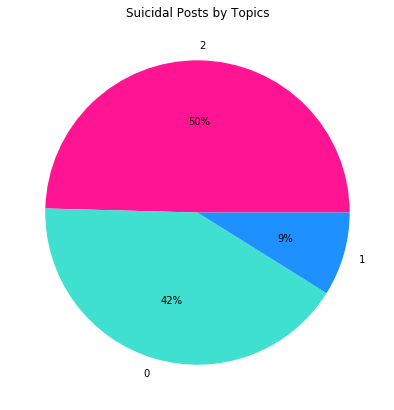

In [178]:
# piechart
title = 'Suicidal Posts by Topics'
colors = ("deeppink","turquoise","dodgerblue","gold","mediumaquamarine")
plt.pie(topic_counts, labels = topic_counts.index, autopct='%1.0f%%',colors=colors) #,textprops = dict(color ="grey"))
fig = plt.gcf()
plt.title(title)
fig.set_size_inches(7,7)

# Insight : Emotions in Topics

In [158]:
# save file
topic_post = pd.DataFrame(topic_df[['text','topic']])
topic_post.to_pickle('pickles/topic.pkl')

In [159]:
# Read file
# emotion by counts
emotion = pd.read_pickle('pickles/emotion.pkl')

# emotions by scores
emotion_score = pd.read_pickle('pickles/emotion_score.pkl')

# topic file
topic = pd.read_pickle('pickles/topic.pkl')

## Emotions by domain

In [160]:
topic_emo = pd.concat([topic,emotion],axis=1)
topic_emo.rename(columns={"text":"Text","topic":"Topic","domain_emotion_by_count": "Emotion"}, inplace=True)
topic_emo

,Text,Topic,Emotion
0,"[fucking, hate, holiday, season, first, thanks...",2,Sadness
1,"[dm, add, discord, want, help, talk, cofactor]",0,Anger
2,"[nearly, always, battled, depression, got, old...",0,Fear
3,"[future, nothing, impenetrable, fog, look, bac...",0,Sadness
4,"[always, fighting, sister, always, lash, mom, ...",0,Anger
...,...,...,...
1293,"[since, felt, depressed, almost, took, life, w...",0,Anger
1294,"[nt, know, reaching, time, seem, appropriate, ...",0,Fear
1295,"[dont, believe, afterlife, stay, night, fear, ...",2,Fear
1296,"[nt, think, actually, kill, thats, scared, nt,...",0,Fear


In [161]:
topic_emo = topic_emo[['Topic','Emotion']]
summary = topic_emo.groupby(['Topic','Emotion']).size().unstack()
summary

Emotion,Anger,Disgust,Fear,Sadness,Surprise
Topic,,,,,
0,78,13,173,232,37
1,30,2,29,48,5
2,113,20,184,279,40


In [162]:
summary1 = topic_emo.groupby('Topic')['Emotion'].value_counts(normalize=True).unstack()
summary1


Emotion,Anger,Disgust,Fear,Sadness,Surprise
Topic,,,,,
0,0.146341,0.024390,0.324578,0.435272,0.069418
1,0.263158,0.017544,0.254386,0.421053,0.043860
2,0.177673,0.031447,0.289308,0.438679,0.062893


In [163]:
summary1 = summary1[['Sadness',"Fear","Anger","Surprise","Disgust"]]
summary1

Emotion,Sadness,Fear,Anger,Surprise,Disgust
Topic,,,,,
0,0.435272,0.324578,0.146341,0.069418,0.024390
1,0.421053,0.254386,0.263158,0.043860,0.017544
2,0.438679,0.289308,0.177673,0.062893,0.031447


Text(0, 0.5, 'Percentage (%)')

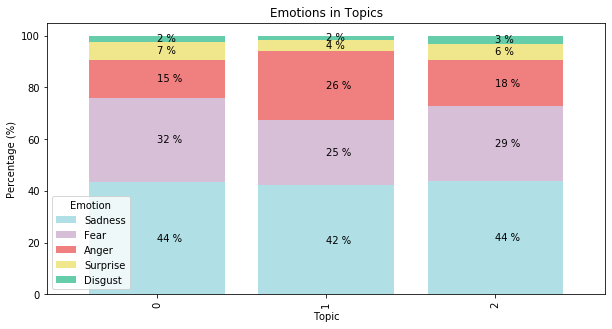

In [164]:
#stack barplot
colors = ("powderblue","thistle","lightcoral","khaki","mediumaquamarine")

ax = summary1.apply(lambda x: x*100/sum(x), axis=1).plot(kind="bar", stacked=True, figsize=(10,5), width=0.8, color=colors)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f} %'.format(height), 
            horizontalalignment='left', 
            verticalalignment='center')
    
plt.title("Emotions in Topics")
plt.xlabel("Topic")
plt.ylabel("Percentage (%)")

## Emotions by Score

In [165]:
topic_emo_score = pd.concat([topic,emotion_score],axis=1)
topic_emo_score.rename(columns={"text":"Text","topic":"Topic","domain_emotion_by_score": "Emotion"}, inplace=True)
topic_emo_score

,Text,Topic,Emotion
0,"[fucking, hate, holiday, season, first, thanks...",2,Sadness
1,"[dm, add, discord, want, help, talk, cofactor]",0,Anger
2,"[nearly, always, battled, depression, got, old...",0,Fear
3,"[future, nothing, impenetrable, fog, look, bac...",0,Sadness
4,"[always, fighting, sister, always, lash, mom, ...",0,Anger
...,...,...,...
1293,"[since, felt, depressed, almost, took, life, w...",0,Sadness
1294,"[nt, know, reaching, time, seem, appropriate, ...",0,Fear
1295,"[dont, believe, afterlife, stay, night, fear, ...",2,Fear
1296,"[nt, think, actually, kill, thats, scared, nt,...",0,Fear


In [166]:
topic_emo_score = topic_emo_score[['Topic','Emotion']]
summary2 = topic_emo.groupby(['Topic','Emotion']).size().unstack()
summary2

Emotion,Anger,Disgust,Fear,Sadness,Surprise
Topic,,,,,
0,78,13,173,232,37
1,30,2,29,48,5
2,113,20,184,279,40


In [167]:
summary3 = topic_emo_score.groupby('Topic')['Emotion'].value_counts(normalize=True).unstack()
summary3


Emotion,Anger,Disgust,Fear,Sadness,Surprise
Topic,,,,,
0,0.106942,0.018762,0.397749,0.446529,0.030019
1,0.245614,0.043860,0.245614,0.429825,0.035088
2,0.116352,0.036164,0.323899,0.487421,0.036164


In [168]:
summary3 = summary3[['Sadness',"Fear","Anger","Surprise","Disgust"]]
summary3

Emotion,Sadness,Fear,Anger,Surprise,Disgust
Topic,,,,,
0,0.446529,0.397749,0.106942,0.030019,0.018762
1,0.429825,0.245614,0.245614,0.035088,0.043860
2,0.487421,0.323899,0.116352,0.036164,0.036164


Text(0, 0.5, 'Percentage (%)')

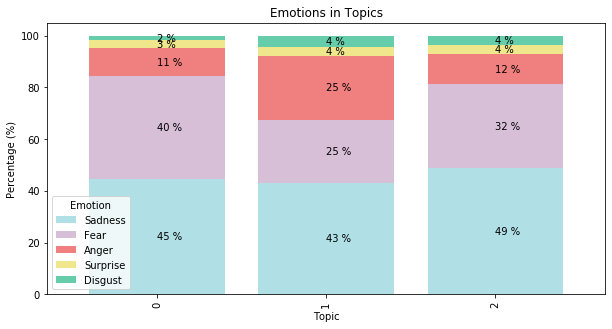

In [169]:
#stack barplot
colors = ("powderblue","thistle","lightcoral","khaki","mediumaquamarine")

ax = summary3.apply(lambda x: x*100/sum(x), axis=1).plot(kind="bar", stacked=True, figsize=(10,5), width=0.8, color=colors)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f} %'.format(height), 
            horizontalalignment='left', 
            verticalalignment='center')
    
plt.title("Emotions in Topics")
plt.xlabel("Topic")
plt.ylabel("Percentage (%)")

## Export Results

In [179]:
# User this line to save to html
!jupyter nbconvert --to html_ch --output-dir='.\html' "4. Topic Modelling.ipynb"

[NbConvertApp] Converting notebook 4. Topic Modelling.ipynb to html_ch
[NbConvertApp] Writing 718773 bytes to .\html\4. Topic Modelling.html


# ----------------------------------------------END----------------------------------------------------------